In [1]:
from random import uniform
from itertools import groupby

repetition_factor = 7 # the sequential log permutations (starting at 10) to which pi should calculate
num_pi_calc = 5 # the number of batches per permutation
final_values = []

def pi_estimate(n):
    var = 0
    for i in range(n):
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        if (x * x) + (y * y) <= 1:
            var += 1
    probability = var / n
    pi_estimate = 4 * probability
    final_value = pi_estimate
    return final_value

results = []

for i in range(num_pi_calc):
    n = 1
    for _ in range(repetition_factor):
        final_value = pi_estimate(n)
        results.append((final_value, n))
        n *= 10

results.sort(key=lambda x: x[1])

final_values = [result[0] for result in results]
# thank you Stack Overflow <3

master_list = []
for i in range(repetition_factor):
    split_list = final_values[0+i*num_pi_calc:num_pi_calc+i*num_pi_calc]
    master_list.append(split_list)


In [2]:
import statistics
for split_list in master_list:
    std_deviation = statistics.stdev(split_list)
    print(split_list, ":", std_deviation)

[4.0, 0.0, 4.0, 0.0, 4.0] : 2.1908902300206643
[3.2, 3.6, 2.8, 2.8, 3.2] : 0.3346640106136304
[3.24, 3.04, 3.2, 2.92, 3.12] : 0.1283744522870498
[3.172, 3.18, 3.212, 3.08, 3.08] : 0.061018030122251626
[3.132, 3.1576, 3.1448, 3.1384, 3.15] : 0.009942233149549413
[3.1396, 3.1364, 3.13816, 3.14592, 3.14] : 0.0035899415037015936
[3.141628, 3.142784, 3.143664, 3.139556, 3.140968] : 0.0015943726038790086


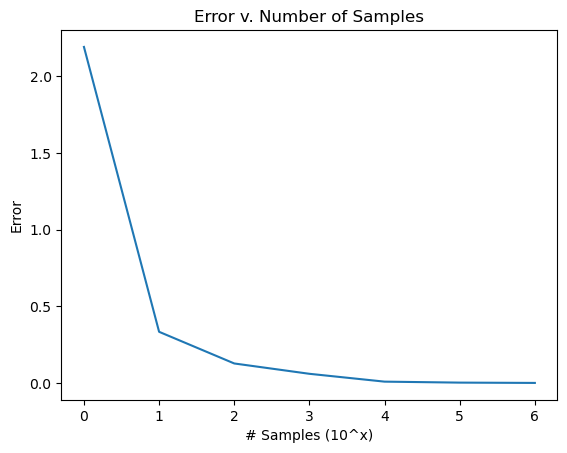

In [3]:
# funcitons to plot the relationship between calculated standard deviation of a set with the number of samp
import matplotlib.pyplot as plt

std_master_list = []
x_axis = []
xa = 0
for split_list in master_list:
    std_deviation = statistics.stdev(split_list)
    std_master_list.append(std_deviation)
    x_axis.append(xa)
    xa += 1
    
plt.title("Error v. Number of Samples")
plt.xlabel("# Samples (10^x)")
plt.ylabel("Error")
plt.plot(x_axis, std_master_list)
plt.show()